In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image

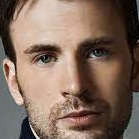

In [2]:
Image.open("D:\WE\ML\Hackathon\Avengers\cropped_images\chris_evans\chris_evans1.png")

In [37]:
input_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\cropped_images\\'

output_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\resized_images\\'

target_size = (224, 224)  

os.makedirs(output_folder, exist_ok=True)

for actor in os.listdir(input_folder):

    actor_path = os.path.join(input_folder, actor)

    actor_output_folder = os.path.join(output_folder, actor)
    
    os.makedirs(actor_output_folder, exist_ok=True)

    for image in os.listdir(actor_path):
        
        with Image.open(os.path.join(actor_path, image)) as img:
        
            resized_img = img.resize(target_size)
        
            output_path = os.path.join(output_folder, actor, image)
        
            resized_img.save(output_path)

In [38]:
input_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\resized_images\\'

train_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\dataset\\train\\'
test_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\dataset\\test\\'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [39]:
for actor in os.listdir(input_folder):
    actor_path = os.path.join(input_folder, actor)
    
    actor_images = [os.path.join(actor_path, img) for img in os.listdir(actor_path)]
    
    train_images, test_images = train_test_split(actor_images, test_size=0.2, random_state=42)
    
    actor_train_folder = os.path.join(train_folder, actor)
    os.makedirs(actor_train_folder, exist_ok=True)

    actor_test_folder = os.path.join(test_folder, actor)
    os.makedirs(actor_test_folder, exist_ok=True)
    
    for img in train_images:
        shutil.copy(img, os.path.join(actor_train_folder, os.path.basename(img)))
        
    for img in test_images:
        shutil.copy(img, os.path.join(test_folder, actor, os.path.basename(img)))

In [40]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
input_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\resized_images\\'

train_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\dataset\\train\\'
test_folder = 'D:\\WE\\ML\\Hackathon\\Avengers\\dataset\\test\\'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [41]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for actor in os.listdir(input_folder):
    actor_path = os.path.join(input_folder, actor)

    actor_images = [os.path.join(actor_path, img) for img in os.listdir(actor_path)]

    train_images, test_images = train_test_split(actor_images, test_size=0.2, random_state=42)

    actor_train_folder = os.path.join(train_folder, actor)
    os.makedirs(actor_train_folder, exist_ok=True)

    for img in train_images:
        shutil.copy(img, os.path.join(actor_train_folder, os.path.basename(img)))

        img_path = os.path.join(actor_train_folder, os.path.basename(img))
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=actor_train_folder, save_prefix=f'{actor}_aug', save_format='png'):
            i += 1
            if i > 1:  
                break

    for img in test_images:
        shutil.copy(img, os.path.join(test_folder, actor, os.path.basename(img)))

print("Data preparation complete.")

Data preparation complete.
